In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Adj Close is the most important in this case so no need to read all columns

In [2]:
#COSTCO
COST = pd.read_csv("COST.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

#WALMART 
WMT = pd.read_csv("WMT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

#TARGET
TGT = pd.read_csv("TGT.csv",index_col = 'Date',parse_dates=True)['Adj Close'] 

#DOLLAR GENERAL
DG = pd.read_csv("DG.csv",index_col = 'Date',parse_dates=True)['Adj Close']

In [3]:
retail = pd.concat([COST, WMT, TGT, DG], axis=1)
retail.columns= ['COST', 'WMT', 'TGT', 'DG']

In [4]:
retail.head()

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478


In [5]:
retail_returns = retail.pct_change(1).dropna()

<Axes: xlabel='Date'>

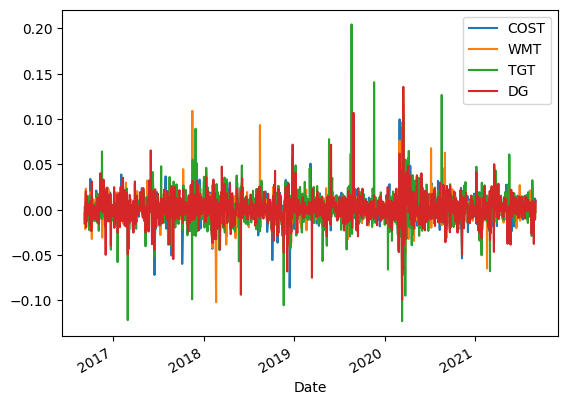

In [6]:
retail_returns.plot()

Cummulative return

In [7]:
cumul_return_COST = (1 + retail_returns['COST']).cumprod()-1
cumul_return_COST

Date
2016-09-07   -0.015311
2016-09-08   -0.029040
2016-09-09   -0.046565
2016-09-12   -0.040301
2016-09-13   -0.046311
                ...   
2021-08-27    2.196244
2021-08-30    2.235919
2021-08-31    2.232796
2021-09-01    2.240106
2021-09-02    2.271690
Name: COST, Length: 1257, dtype: float64

In [8]:
cumul_return_COST = cumul_return_COST*100

<Axes: xlabel='Date'>

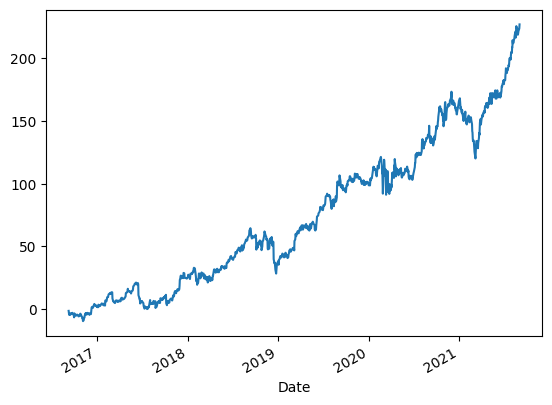

In [9]:
cumul_return_COST.plot()

Weighted returns

In [10]:
example_return = np.array([1,0.5]) #From one portofilo there is 100% return, from second 50%
weights = [1,0] #I decided to put on dolar on first porftolio 
np.dot(weights,example_return) #The profitof the investment is one dollar

1.0

In [11]:
N = len(retail_returns.columns)
equal_weights = N *[1/N]

In [12]:
equal_returns = np.dot(equal_weights,retail_returns.transpose())

In [13]:
#Splitting portfolio 
equal_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [14]:
cum_equal_returns = (1+ equal_returns).cumprod()-1

In [15]:
per_cum_equal_returns = 100*cum_equal_returns

In [16]:
pcer = pd.Series(per_cum_equal_returns, index=retail_returns.index)

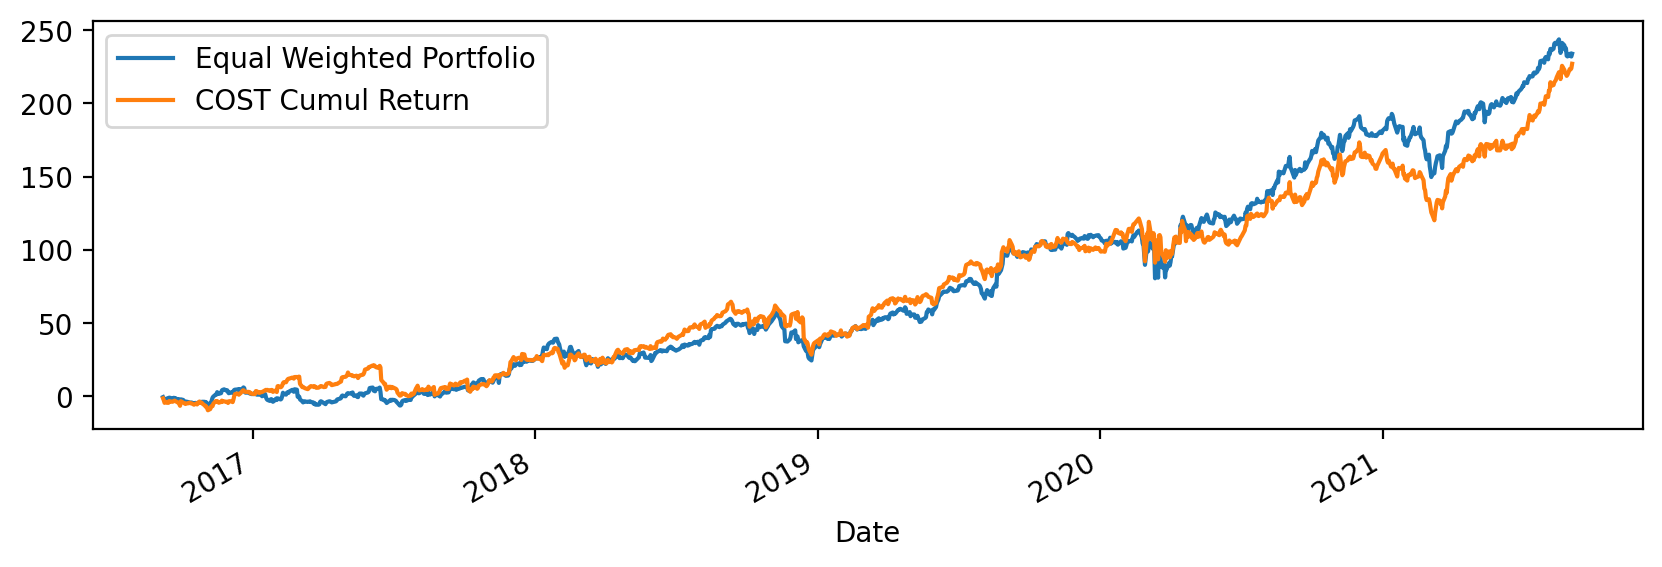

In [17]:
plt.figure(figsize=(10,3), dpi=200)
pcer.plot(label='Equal Weighted Portfolio')
cumul_return_COST.plot(label='COST Cumul Return')
plt.legend()

Monte Carlo simulation

In [18]:
log_rets = np.log(retail/retail.shift(1))
log_rets

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [19]:
#Generating Random Weights
N = len(retail.columns)
weights = np.random.random(N)

In [20]:
weights / np.sum(weights)

array([0.04668989, 0.0543258 , 0.46081911, 0.43816519])

In [21]:
def generate_weights (N):
    weights = np.random.random(N)
    return weights/np.sum(weights)

In [22]:
generate_weights(4)

array([0.40964148, 0.46150605, 0.04123091, 0.08762156])

In [23]:
def calcualte_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) *252

In [24]:
log_rets.cov()

,COST,WMT,TGT,DG
COST,0.000176,0.000107,0.000120,0.000104
WMT,0.000107,0.000187,0.000121,0.000108
TGT,0.000120,0.000121,0.000370,0.000170
DG,0.000104,0.000108,0.000170,0.000248


In [25]:
def calculate_vol (weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov * 252, weights)
    vol = np.dot(weights.transpose (), annualized_cov)
    return np.sqrt(vol)

In [26]:
calculate_vol(weights,log_rets.cov())

0.487577313216967

In [27]:
log_rets = np.log(retail/retail.shift(1))
log_rets_cov = log_rets.cov()

In [28]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

#Higher number longer simulation time
for sim in range (100000):
    weights = generate_weights(N=4)
    mc_weights.append(weights)
    sim_returns = calcualte_returns(weights,log_rets)
    mc_portfolio_returns.append(sim_returns)
    sim_vol = calculate_vol(weights, log_rets_cov)
    mc_portfolio_vol.append(sim_vol)

In [29]:
mc_sharpe_ratio = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

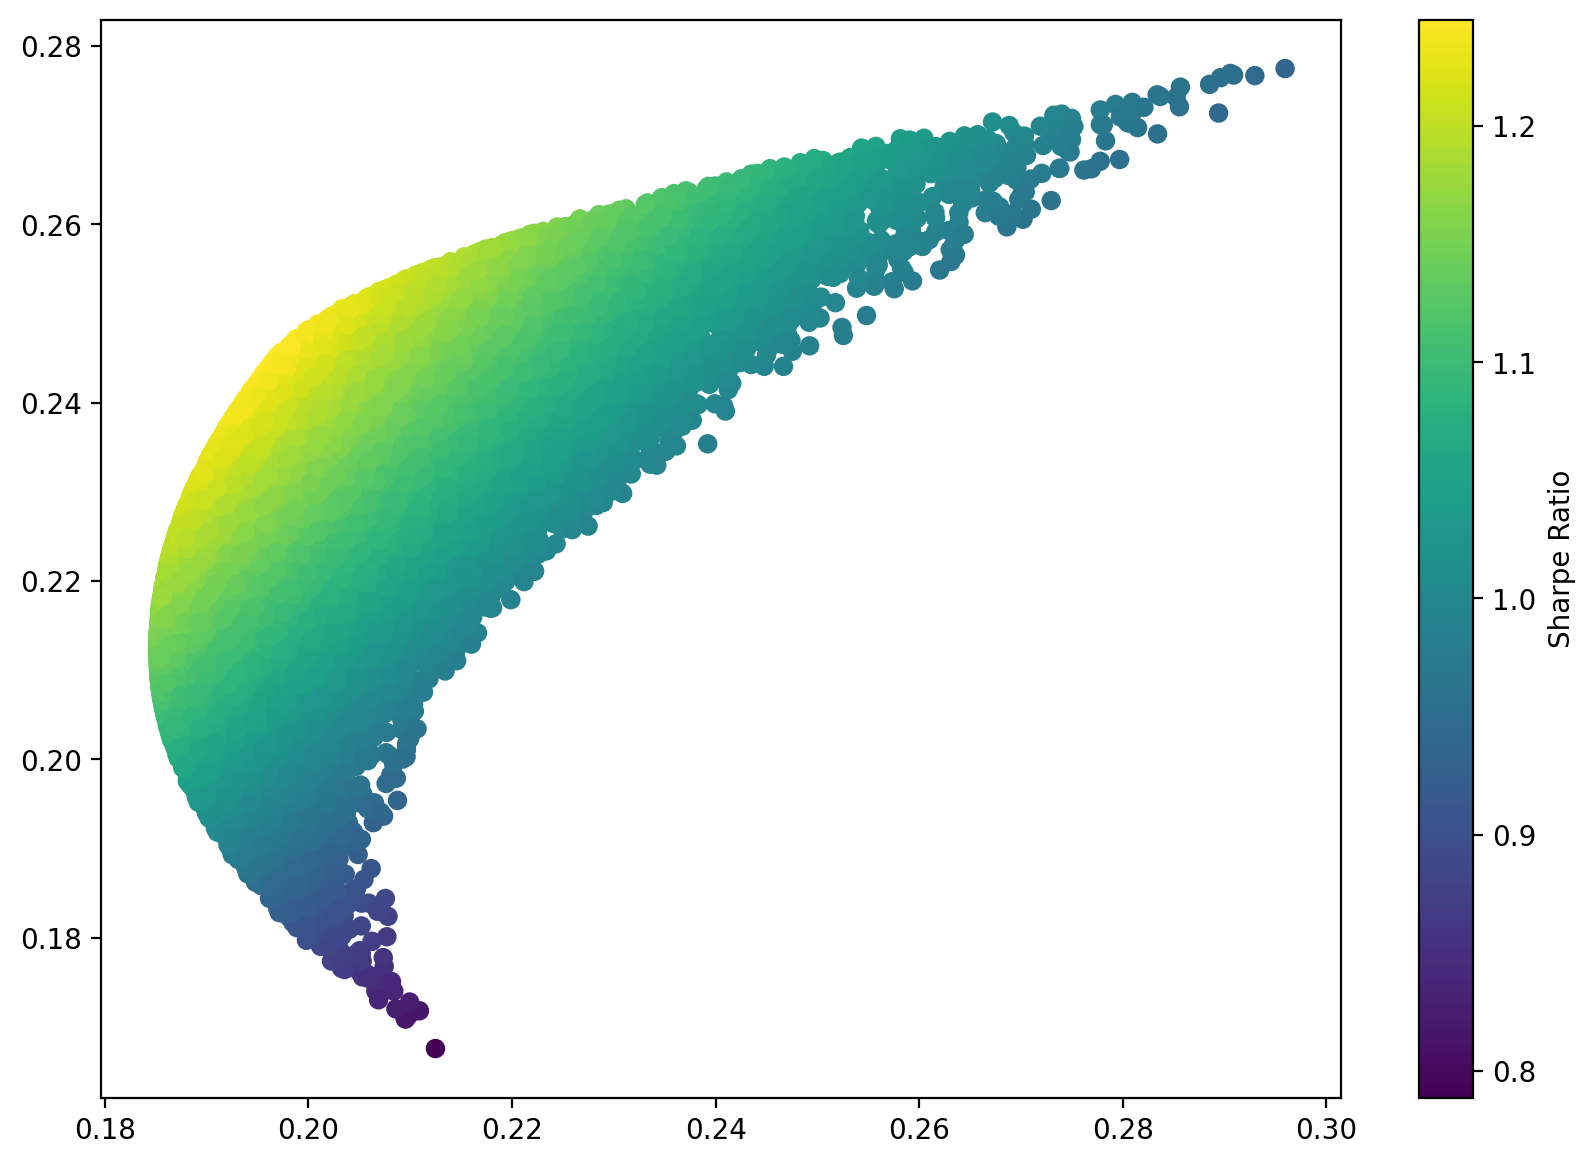

In [30]:
plt.figure(dpi=200, figsize=(10,7))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns, c=mc_sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')
plt.show()

In [31]:
np.argmax(mc_sharpe_ratio)

84735

In [32]:
#For sharpe ration from np.argmax distrubite money as following weights. Nothing to WMT more than half to COST. Check columns!!!
mc_weights[27291]

array([0.3240201 , 0.13214614, 0.34609629, 0.19773747])

In [33]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


Minimatization Search

In [34]:
from scipy.optimize import minimize

In [35]:
def function_to_minimize(weights):
    return -1 * (calcualte_returns(weights,log_rets)/calculate_vol(weights,log_rets_cov))

In [36]:
bounds = tuple((0,1) for n in range(N))

In [37]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [38]:
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [39]:
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [40]:
minimize(fun=function_to_minimize, x0=equal_weights, bounds=bounds, constraints=sum_constraint)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2451267776065353
       x: [ 5.846e-01  0.000e+00  1.768e-01  2.386e-01]
     nit: 4
     jac: [-3.517e-04  5.834e-02  1.120e-03  3.202e-05]
    nfev: 20
    njev: 4

[ 5.846e-01  0.000e+00  1.768e-01  2.386e-01] weights ofhow to separte protfolio

<Axes: xlabel='Date'>

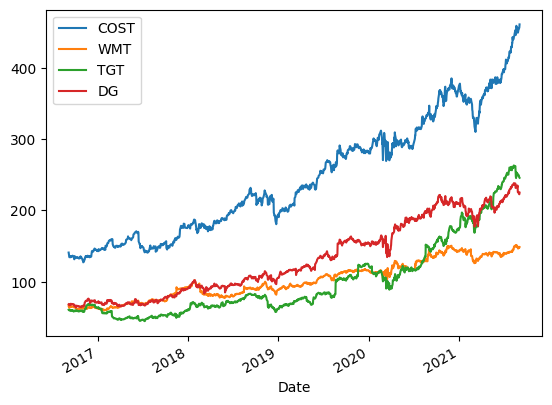

In [41]:
retail.plot()

In [42]:
expected_returns_range = np.linspace(0.18,0.28,100)

In [43]:
constrains = ({'type':'eq','fun':lambda weights: np.sum(weights)-1},
              {'type':'eq','fun': lambda weights: calcualte_returns(weights, log_rets)- possible_return})

In [44]:
def calculate_voll(weights):
    annualized_cov = np.dot(log_rets_cov * 252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [45]:
frontier_vol = []
portfolio_holdings = []

for possible_return in expected_returns_range:
    result = minimize(calculate_voll, equal_weights, bounds=bounds, constraints=constrains)

    frontier_vol.append(result['fun'])
    portfolio_holdings.append(result['fun'])

[]

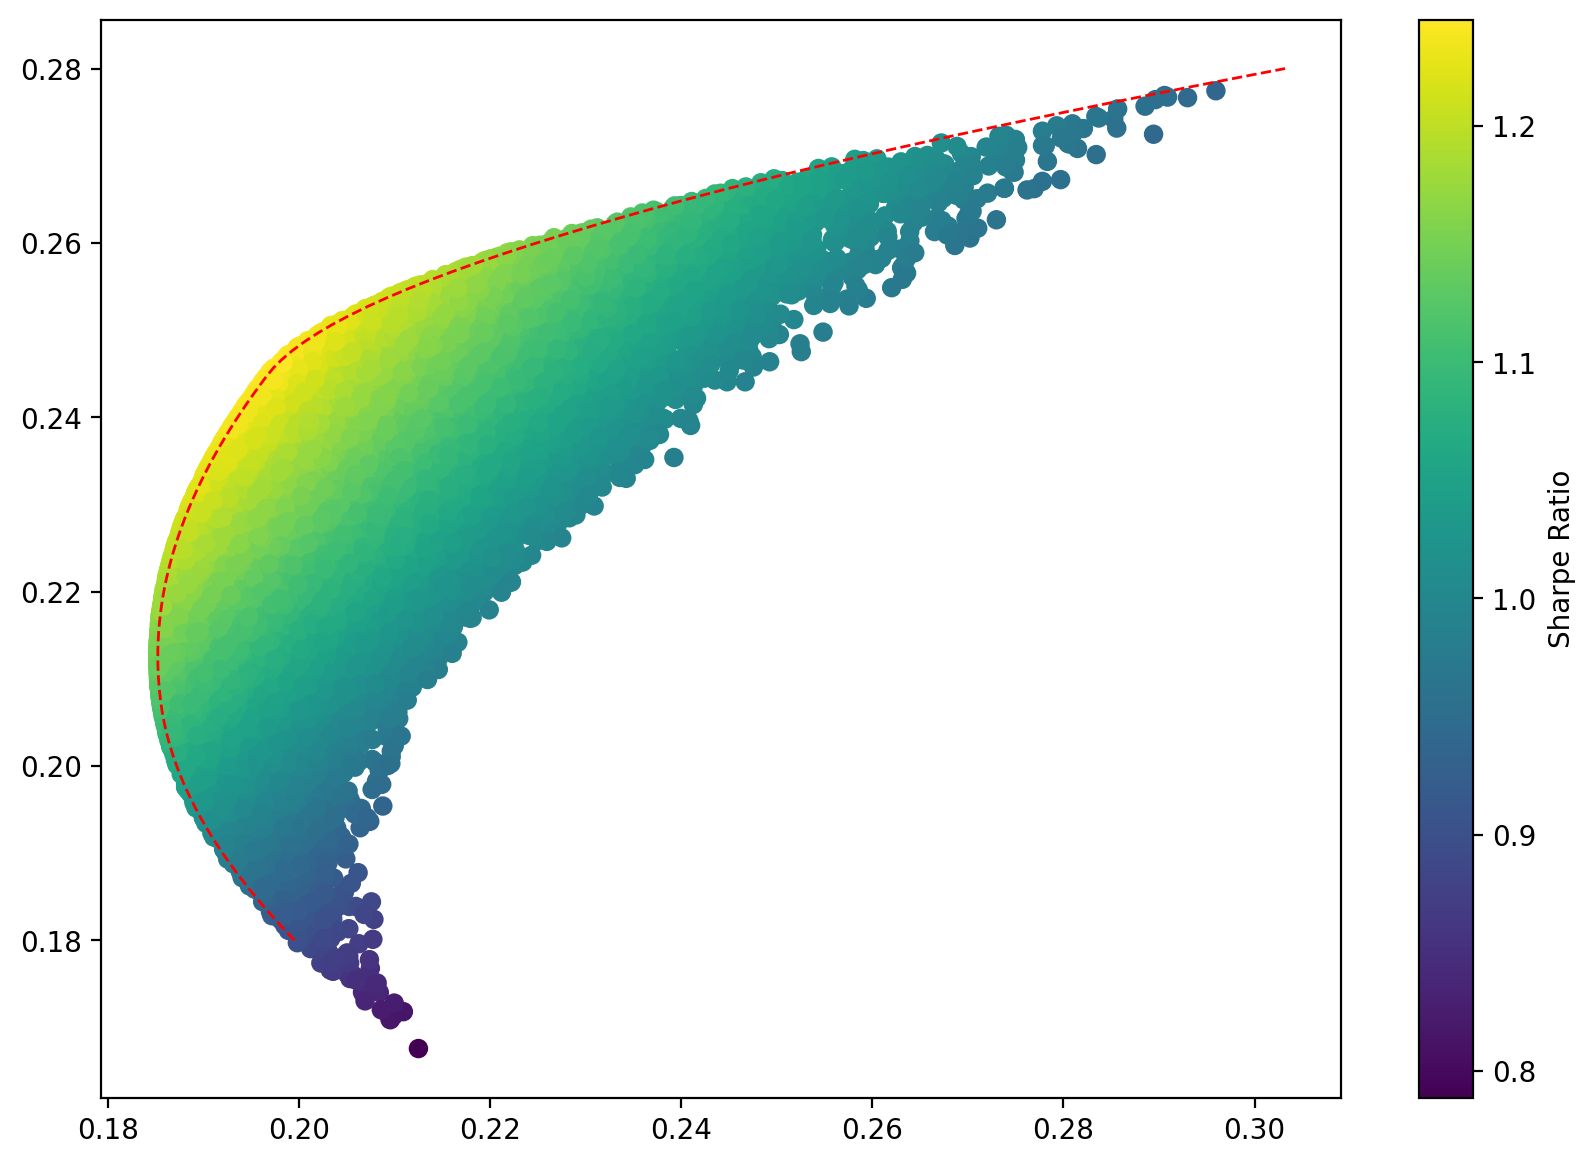

In [46]:
plt.figure(dpi=200, figsize=(10,7))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns, c=mc_sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')

plt.plot(frontier_vol,expected_returns_range,'r--',linewidth=1)
plt.plot()